#Importing Libraries

In [89]:
import numpy as np  #for numerical computations and arrays.
import pandas as pd  #for data manipulation and analysis, providing data structures like DataFrames.
import seaborn as sns  #for data visualization, for drawing attractive and informative statistical graphics.
import matplotlib.pyplot as plt  #a plotting library used to create visualizations in Python.
from sklearn.model_selection import train_test_split  #Used to split data into training and testing sets for machine learning models.
from sklearn.preprocessing import StandardScaler  # StandardScaler is used for standardizing features by removing the mean and scaling to unit variance.
from sklearn.cluster import KMeans# These are various clustering algorithms used to group data points.
from sklearn.tree import DecisionTreeClassifier  #a type of classifier based on decision trees for classification tasks.
from sklearn.metrics import classification_report #used to generate a comprehensive report showing  precision, recall, F1-score, and support for each class in the target variable.
from sklearn import tree  # Provides tools for creating and visualizing decision tree models.
from sklearn import metrics  # Contains various metrics used for evaluating machine learning models.


#Data Collection & Pre-processing

######Loading The Dataset

In [90]:
# loading the data from csv file to a Pandas DataFrame
mall_customers = pd.read_csv('/content/Mall_Customers.csv')

In [91]:
# first 5 rows in the dataframe
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [92]:
#Handling missing values
mall_customers.isna().sum() #Calculates the sum of missing values for each column in the DataFrame.


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [93]:
#Handling duplicate rows
mall_customers.duplicated().sum()

0

In [94]:
#Encoding Male and Female into binary values
# Replace 'Female' with 1 and 'Male' with 0 in the 'Gender' column
mall_customers['Gender'] = mall_customers['Gender'].replace({'Female': 1, 'Male': 0})

mall_customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


#Exploratory Data Analysis

In [95]:
# finding the number of rows and columns
mall_customers.shape

(200, 5)

In [96]:
# getting some informations about the dataset
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [97]:
# Display statistical information
mall_customers.describe()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


######Visualizing Data Distribution & Density

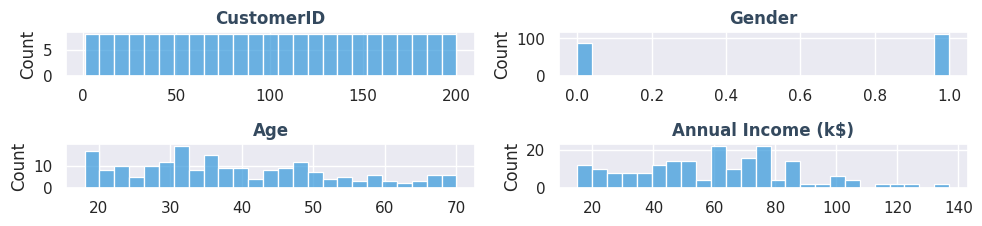

In [98]:
# Setting up a figure to contain multiple subplots for visualizations
plt.figure(figsize=(10, 10))

# Looping through the columns in the dataset for creating individual subplots
for i in range(0, 4):
    plt.subplot(9, 2, i+1)

    sns.histplot(mall_customers[mall_customers.columns[i]], color='#3498db', alpha=0.7, bins=25)
    plt.title(mall_customers.columns[i], fontsize=12, fontweight='bold', color='#34495e')

    plt.xlabel('') # Removing x-axis label for clarity

# Adjusting the layout to prevent overlapping of subplots and displaying the figures
plt.tight_layout()
plt.show()


######Visualizing Data Correlation

> To identify how strongly variables are related. Whether positively or negatively correlated.


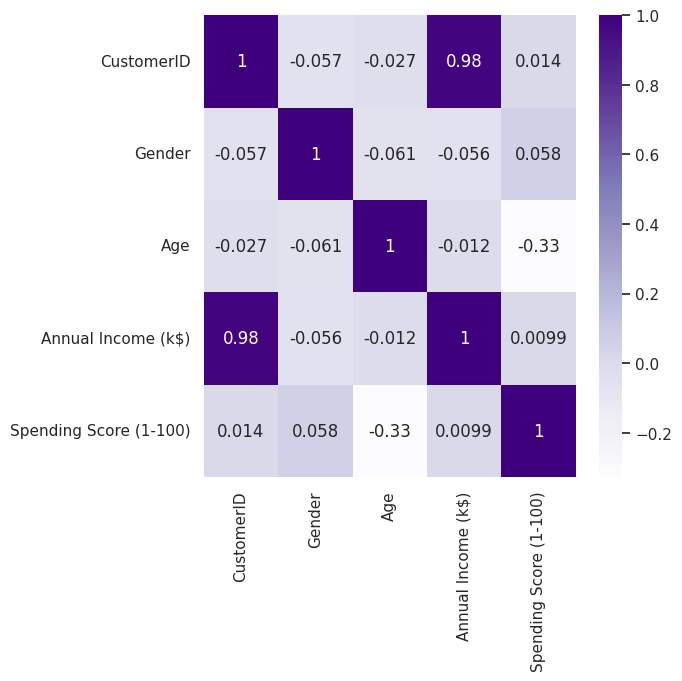

In [99]:
#Visualizing Correlation Of the Data
plt.figure(figsize=(6, 6))
sns.heatmap(mall_customers.corr(), annot=True, cmap='Purples')
plt.show()

Choosing the Annual Income Column & Spending Score column

In [100]:
# Extracting the "Annual Income" and  "Spendinf Score" columns from the DataFrame 'mall_customers'

# Using iloc[:, [3, 4]] to select all rows and the 4th and 5th columns (Annual Income and Spending Score respectively)
# The resulting 'X' will represent a NumPy array containing data.
mall_customers_subset = mall_customers.iloc[:, [3, 4]].values
mall_customers_subset

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

####Scaling the DataFrame
Transforming the values of different variables to a standard range, ensuring that no variable dominates due to its magnitude.


In [101]:
scalar = StandardScaler()  # Initializes a StandardScaler object
mall_customers_scaled = scalar.fit_transform(mall_customers)  # Scales the 'insurance_customer' data


#Model Training

Finding The Number Of CLusters Using the Elbow Method

Choosing the number of clusters

WCSS  ->  Within Clusters Sum of Squares

In [102]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(mall_customers_subset)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

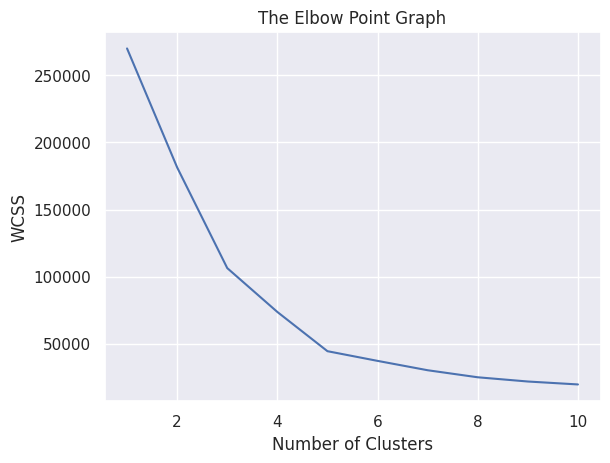

In [103]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

Training the k-Means Clustering Model

In [104]:
# Initialize a KMeans object with specified parameters:
# n_clusters=5: Indicates the number of clusters to form as well as the number of centroids to generate.
# init='k-means++': Method for initializing centroids. 'k-means++' selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
# random_state=0: Determines random number generation for centroid initialization. It sets the seed for reproducibility.
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# Fit the KMeans model to the 'mall_customers_subset' dataset.
# The 'fit_predict' method fits the model to the data and returns cluster labels for each data point.
clusters = kmeans.fit_predict(mall_customers_subset)

# Print the cluster labels assigned to each data point.
print(clusters)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 Clusters -  0, 1, 2, 3, 4

Visualizing all the Clusters

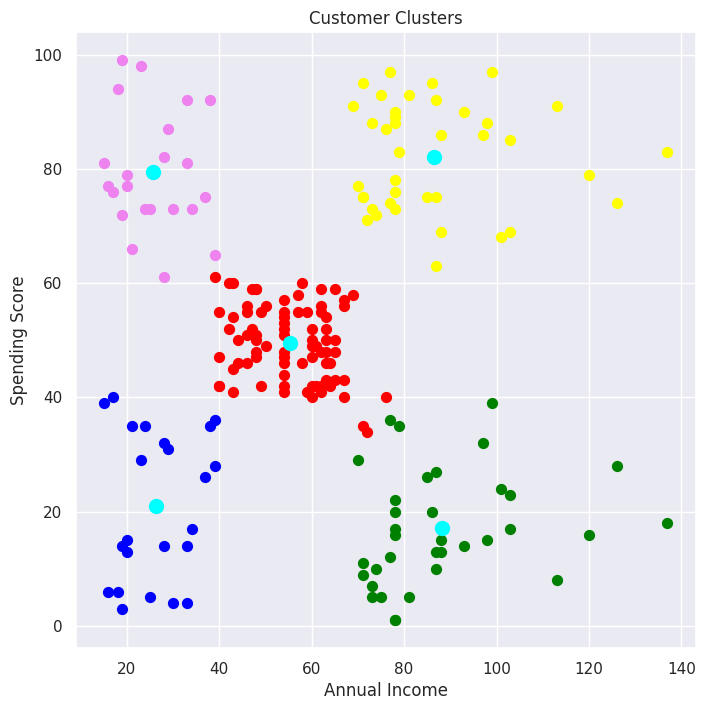

In [105]:
# Create a figure for the plot with specified size
plt.figure(figsize=(8,8))

# Plot data points for each cluster separately based on cluster labels and colors
plt.scatter(mall_customers_subset[clusters==0,0], mall_customers_subset[clusters==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(mall_customers_subset[clusters==1,0], mall_customers_subset[clusters==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(mall_customers_subset[clusters==2,0], mall_customers_subset[clusters==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(mall_customers_subset[clusters==3,0], mall_customers_subset[clusters==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(mall_customers_subset[clusters==4,0], mall_customers_subset[clusters==4,1], s=50, c='blue', label='Cluster 5')

# Plot centroids for each cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

# Set plot title and labels for x and y axes
plt.title('Customer Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

# Show the plot
plt.show()


In [106]:
# Create a DataFrame 'cluster_segment_df' by concatenating 'mall_customers' DataFrame with a new DataFrame containing the 'Cluster' labels incremented by 1.
mall_customers_clusters = pd.concat([mall_customers, pd.DataFrame({'Cluster': kmeans.labels_ + 1})], axis=1)

# Print the resulting DataFrame 'cluster_segment_df'
mall_customers_clusters


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,5
1,2,0,21,15,81,4
2,3,1,20,16,6,5
3,4,1,23,16,77,4
4,5,1,31,17,40,5
...,...,...,...,...,...,...
195,196,1,35,120,79,3
196,197,1,45,126,28,1
197,198,0,32,126,74,3
198,199,0,32,137,18,1


In [107]:
# Define a function 'map_cluster_to_category' that maps cluster labels to corresponding category names
def map_cluster_to_category(row):
    if row["Cluster"] == 1:
        return 'Bronze Category'   # If the value in the "Cluster" column is 1, assign 'Bronze Category'
    elif row["Cluster"] == 2:
        return 'Gold Category'   # If the value in the "Cluster" column is 2, assign 'Gold Category'
    elif row["Cluster"] == 3:
        return 'Premium Category'  # If the value in the "Cluster" column is 3, assign 'Premium Category'
    elif row["Cluster"] == 4:
        return "Platinum Category"  # If the value in the "Cluster" column is 4, assign 'Platinum Category'
    else:
        return "Silver Category"   # For any other value in "Cluster", assign 'Silver Category'

# Apply the 'map_cluster_to_category' function row-wise on the 'cluster_segment_df' DataFrame
# to create a new column 'Customer_Category' based on the 'Cluster' column values
mall_customers_clusters['Customer_Category'] = mall_customers_clusters.apply(map_cluster_to_category, axis=1)

# Display the updated DataFrame 'cluster_segment_df' with the new column 'Customer_Category'
mall_customers_clusters

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Customer_Category
0,1,0,19,15,39,5,Silver Category
1,2,0,21,15,81,4,Platinum Category
2,3,1,20,16,6,5,Silver Category
3,4,1,23,16,77,4,Platinum Category
4,5,1,31,17,40,5,Silver Category
...,...,...,...,...,...,...,...
195,196,1,35,120,79,3,Premium Category
196,197,1,45,126,28,1,Bronze Category
197,198,0,32,126,74,3,Premium Category
198,199,0,32,137,18,1,Bronze Category


<Axes: xlabel='Cluster', ylabel='count'>

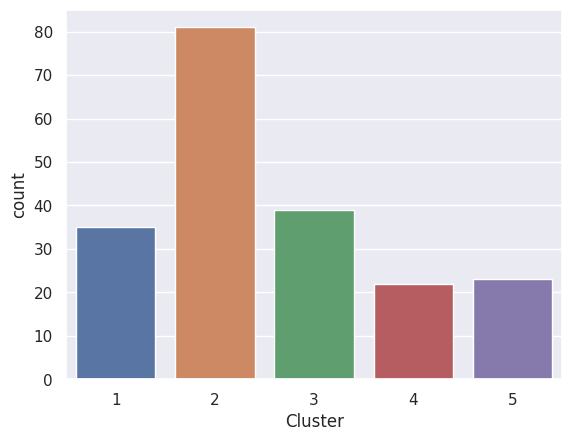

In [108]:
#Visualization
sns.countplot(x='Cluster', data=mall_customers_clusters)

In [109]:
# Create separate DataFrames for each cluster based on their respective cluster labels

cluster_1_df = mall_customers_clusters[mall_customers_clusters["Cluster"] == 1]
cluster_1_df.head()

cluster_2_df =  mall_customers_clusters[mall_customers_clusters["Cluster"] == 2]
cluster_2_df.head()

cluster_3_df =  mall_customers_clusters[mall_customers_clusters["Cluster"] == 3]
cluster_3_df.head()

cluster_4_df =  mall_customers_clusters[mall_customers_clusters["Cluster"] == 4]
cluster_4_df.head()

cluster_5_df =  mall_customers_clusters[mall_customers_clusters["Cluster"] == 5]
cluster_5_df.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Customer_Category
0,1,0,19,15,39,5,Silver Category
2,3,1,20,16,6,5,Silver Category
4,5,1,31,17,40,5,Silver Category
6,7,1,35,18,6,5,Silver Category
8,9,0,64,19,3,5,Silver Category


In [110]:
# Group the 'mall_customers_clusters' DataFrame by the 'Cluster' column and calculate the mean for each specified metric
cluster_averages = mall_customers_clusters.groupby("Cluster")[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

# Display the resulting DataFrame 'cluster_averages' showing the mean values of 'Age', 'Annual Income', and 'Spending Score' for each cluster
cluster_averages


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
1,41.114286,88.200000,17.114286
2,42.716049,55.296296,49.518519
3,32.692308,86.538462,82.128205
4,25.272727,25.727273,79.363636
5,45.217391,26.304348,20.913043


In [111]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans, "kmeans.pkl")

['kmeans.pkl']

mall_customers_clusters.to_csv("Clustered_Mall_Customer_Data.csv")



#Model Training & Testing

######Splitting into training & testing data

In [112]:
# Split the 'mall_customers_clusters' DataFrame into features (X) and target (y) variables
# X contains features except for 'Cluster' and 'Customer_Category' columns
X = mall_customers_clusters.drop(['Cluster', 'Customer_Category'], axis=1)

# y contains the target variable 'Cluster'
y = mall_customers_clusters[['Cluster']]

# Split the data into training and testing sets using train_test_split function
# Here, the data is split into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [113]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 53 to 105
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Cluster  140 non-null    int32
dtypes: int32(1)
memory usage: 1.6 KB


In [114]:
# Initialize a Decision Tree Classifier model
model = DecisionTreeClassifier(criterion="entropy")

# Train the Decision Tree model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


######Model Evaluation Using Confusion Matrix and Classification Report


> Confusion Matrix visualizes the performance of an algorithm. It compares the predicted labels of a model against the true labels in a tabular format.


> The classification report provides a summary of important classification metrics like precision, recall, F1-score, and support for each class in the target variable.

In [115]:
# Calculate and print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

# Generate and print the classification report
print(classification_report(y_test, y_pred))


[[11  2  0  0  0]
 [ 2 20  0  0  0]
 [ 0  0 11  1  0]
 [ 0  0  0  6  0]
 [ 0  1  0  0  6]]
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        13
           2       0.87      0.91      0.89        22
           3       1.00      0.92      0.96        12
           4       0.86      1.00      0.92         6
           5       1.00      0.86      0.92         7

    accuracy                           0.90        60
   macro avg       0.91      0.91      0.91        60
weighted avg       0.90      0.90      0.90        60



In [116]:
import pickle
filename = 'customer_Segmntation_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9 % Acuuracy
